In [1]:
# Imports
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import joblib
from sklearn import set_config
import matplotlib.pyplot as plt
import warnings
import telegram_ds

# Notebook Settings
warnings.filterwarnings("ignore")  # we don't like warnings :)
sns.set()
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = [12, 7]
set_config(display="diagram")
%load_ext nb_black

/home/mschots/anaconda3/envs/novo/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<IPython.core.display.Javascript object>

In [2]:
# Reading data (straight from zip)
wine = pd.read_csv("wine.zip")

<IPython.core.display.Javascript object>

# 1. Initial Exploration

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<IPython.core.display.Javascript object>

In [4]:
f"{wine.shape[0]} rows, {wine.shape[1]} columns"

'1599 rows, 12 columns'

<IPython.core.display.Javascript object>

In [5]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

<IPython.core.display.Javascript object>

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<IPython.core.display.Javascript object>

In [7]:
# NAN'S Check
assert (wine.isna().sum().sum() == 0, "dataset contains nans")

<IPython.core.display.Javascript object>

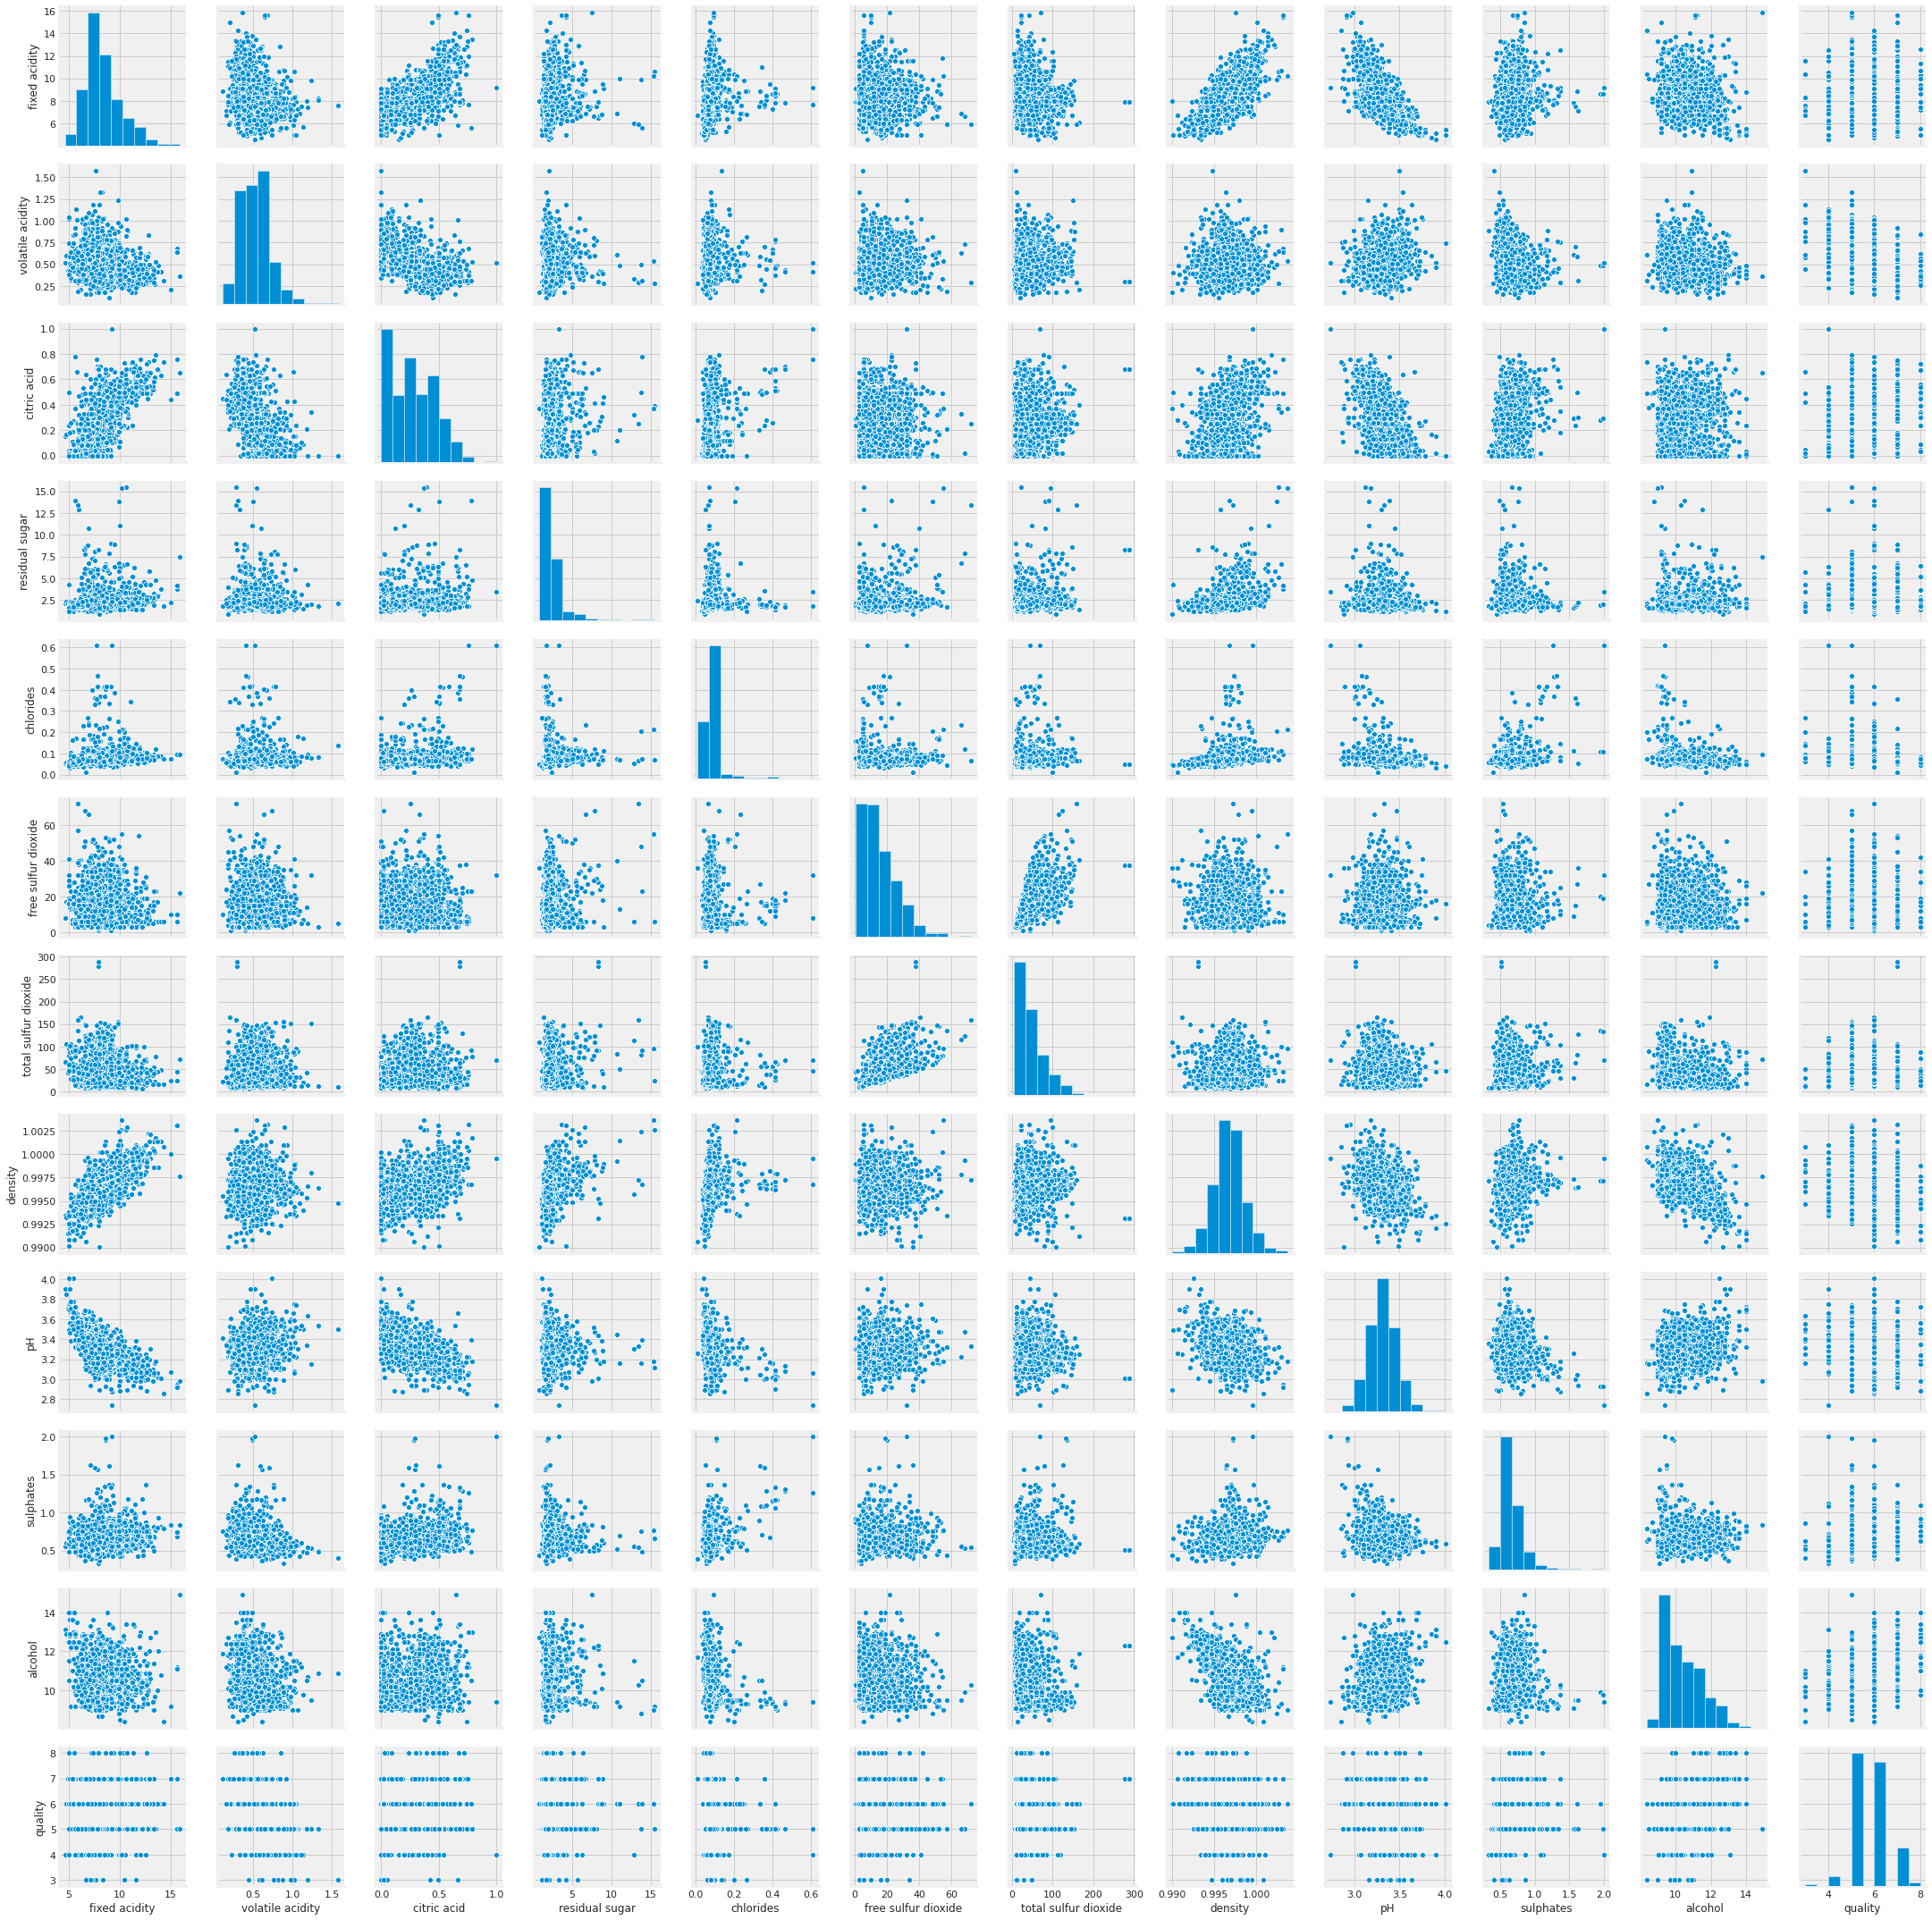

<IPython.core.display.Javascript object>

In [8]:
_ = sns.pairplot(wine)

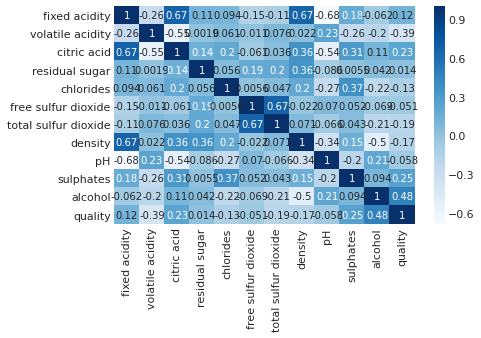

<IPython.core.display.Javascript object>

In [9]:
_ = telegram_ds.heatmap(wine)

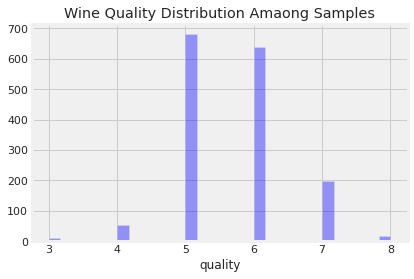

<IPython.core.display.Javascript object>

In [10]:
# Target Distribution
_ = sns.distplot(wine["quality"], kde=False, color="blue")
_ = plt.title("Wine Quality Distribution Amaong Samples")

# 2. Modeling

In [11]:
X = wine.drop("quality", axis=1)
y = wine["quality"]

<IPython.core.display.Javascript object>

In [12]:
# Splitting the Data for Training and Validation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0, stratify=y
)

<IPython.core.display.Javascript object>

In [13]:
# Pipeline Objects
imputer = SimpleImputer(strategy="median")
scaler = StandardScaler()
linear_regression = LinearRegression(n_jobs=-1)
poly = PolynomialFeatures(interaction_only=True)

<IPython.core.display.Javascript object>

In [14]:
# Pipeline Assembly
pipe = make_pipeline(imputer, scaler, poly, linear_regression)
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('polynomialfeatures',
                 PolynomialFeatures(interaction_only=True)),
                ('linearregression', LinearRegression(n_jobs=-1))])

<IPython.core.display.Javascript object>

In [15]:
# Fit
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('polynomialfeatures',
                 PolynomialFeatures(interaction_only=True)),
                ('linearregression', LinearRegression(n_jobs=-1))])

<IPython.core.display.Javascript object>

In [16]:
# Cross-Validates R2
f"5-fold CV R2:{round(cross_val_score(pipe, X_train, y_train, cv=5).mean(), 2)}"

'5-fold CV R2:0.31'

<IPython.core.display.Javascript object>

In [29]:
# Linear Regression Learned
regression_coeffs = pipe.named_steps["linearregression"].coef_
regression_intercept = pipe.named_steps["linearregression"].intercept_
regression_intercept

5.659512215389446

<IPython.core.display.Javascript object>

In [30]:
# Just Predicting the Mean for all Observations
mean_pred = [y_train.mean()] * X_test.shape[0]
preds = mean_pred
f"Mean Prediction R2:{round(r2_score(y_test, mean_pred),2)}, Mean Prediction RMSE:{round(mean_squared_error(y_test, mean_pred,squared = False),2)}"

'Mean Prediction R2:-0.0, Mean Prediction RMSE:0.8'

<IPython.core.display.Javascript object>

# 3. Hyperparameters Search

In [31]:
# Pipeline Parameters Available to Tune
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'polynomialfeatures', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'polynomialfeatures__degree', 'polynomialfeatures__include_bias', 'polynomialfeatures__interaction_only', 'polynomialfeatures__order', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize'])

<IPython.core.display.Javascript object>

In [20]:
# GridSearch Parameters Space
params = {}
params["simpleimputer"] = [None, SimpleImputer()]
params["standardscaler"] = [None, StandardScaler(), MinMaxScaler()]
params["polynomialfeatures"] = [None, PolynomialFeatures()]

<IPython.core.display.Javascript object>

In [32]:
# Gridsearch
grid = GridSearchCV(pipe, params, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures(interaction_only=True)),
                                       ('linearregression',
                                        LinearRegression(n_jobs=-1))]),
             param_grid={'polynomialfeatures': [None, PolynomialFeatures()],
                         'simpleimputer': [None, SimpleImputer()],
                         'standardscaler': [None, StandardScaler(),
                                            MinMaxScaler()]})

<IPython.core.display.Javascript object>

In [33]:
results = pd.DataFrame(grid.cv_results_)
results.sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomialfeatures,param_simpleimputer,param_standardscaler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010745,0.005937,0.005671,0.003137,None,None,None,"{'polynomialfeatures': None, 'simpleimputer': ...",0.268876,0.415879,0.332516,0.332772,0.343780,0.338764,0.046757,1
3,0.005922,0.000640,0.002034,0.000054,None,SimpleImputer(),None,"{'polynomialfeatures': None, 'simpleimputer': ...",0.268876,0.415879,0.332516,0.332772,0.343780,0.338764,0.046757,1
1,0.005771,0.001010,0.002023,0.000107,None,None,StandardScaler(),"{'polynomialfeatures': None, 'simpleimputer': ...",0.268876,0.415879,0.332516,0.332772,0.343780,0.338764,0.046757,3
4,0.005579,0.000664,0.002061,0.000243,None,SimpleImputer(),StandardScaler(),"{'polynomialfeatures': None, 'simpleimputer': ...",0.268876,0.415879,0.332516,0.332772,0.343780,0.338764,0.046757,3
2,0.004979,0.000624,0.002074,0.000258,None,None,MinMaxScaler(),"{'polynomialfeatures': None, 'simpleimputer': ...",0.268876,0.415879,0.332516,0.332772,0.343780,0.338764,0.046757,5
5,0.004924,0.000245,0.001884,0.000067,None,SimpleImputer(),MinMaxScaler(),"{'polynomialfeatures': None, 'simpleimputer': ...",0.268876,0.415879,0.332516,0.332772,0.343780,0.338764,0.046757,5
6,0.021947,0.014273,0.002926,0.000108,PolynomialFeatures(),None,None,"{'polynomialfeatures': PolynomialFeatures(), '...",0.196552,0.345475,0.290974,0.298266,0.329859,0.292225,0.051852,7
9,0.014254,0.001938,0.003913,0.000991,PolynomialFeatures(),SimpleImputer(),None,"{'polynomialfeatures': PolynomialFeatures(), '...",0.196552,0.345475,0.290974,0.298266,0.329859,0.292225,0.051852,7
8,0.011718,0.000689,0.003676,0.000846,PolynomialFeatures(),None,MinMaxScaler(),"{'polynomialfeatures': PolynomialFeatures(), '...",0.196552,0.345475,0.290974,0.298266,0.329859,0.292225,0.051852,9
11,0.012860,0.000409,0.003318,0.000044,PolynomialFeatures(),SimpleImputer(),MinMaxScaler(),"{'polynomialfeatures': PolynomialFeatures(), '...",0.196552,0.345475,0.290974,0.298266,0.329859,0.292225,0.051852,9


<IPython.core.display.Javascript object>

In [34]:
# Melhor Pipeline
best_estimator = grid.best_estimator_

<IPython.core.display.Javascript object>

In [35]:
preds = best_estimator.predict(X_test)
f"Tuned R2:{round(r2_score(y_test, preds),2)}, Tuned RMSE:{round(mean_squared_error(y_test,preds,squared = False),2)}"

'Tuned R2:0.38, Tuned RMSE:0.63'

<IPython.core.display.Javascript object>

In [36]:
# Model to Disk (Serialization)
filename = "pipeline_best_model.sav"
joblib.dump(grid.best_estimator_, filename)

['pipeline_best_model.sav']

<IPython.core.display.Javascript object>

Serialization is the process of converting an object into a stream of bytes to store the object or transmit it to memory, a database, or a file. Its main purpose is to save the state of an object in order to be able to recreate it when needed. The reverse process is called deserialization.

In [37]:
# Loading the Best Model from Disk
loaded_model = joblib.load(filename)
best_preds = loaded_model.predict(X_test)

<IPython.core.display.Javascript object>

In [38]:
best_preds

array([6.14868175, 5.99274186, 5.35166313, 6.46060324, 6.13689686,
       6.46201835, 5.89637782, 5.25763734, 5.67495548, 5.28024062,
       6.13749898, 4.95739584, 5.52137785, 5.29927734, 5.05942706,
       4.87742632, 5.03888938, 5.1811947 , 6.23486017, 5.1310274 ,
       5.58522433, 5.45010962, 5.35020479, 5.44960929, 6.66359471,
       5.86888084, 5.23375634, 6.15797535, 5.14602982, 5.86888084,
       6.28632452, 5.39551158, 5.22221853, 6.07499548, 6.01394108,
       5.82313961, 6.04896036, 5.99218707, 5.78244969, 6.29354184,
       5.8410786 , 4.68466772, 5.00992539, 5.28982437, 6.49240109,
       5.85634162, 6.60628807, 5.59541109, 6.21808451, 5.26871224,
       5.78574971, 5.10979468, 5.45010962, 5.85910363, 5.10994223,
       6.07507586, 5.41905015, 6.13615386, 5.07150756, 5.73646814,
       5.70965325, 4.98773853, 5.77188395, 6.44090234, 5.05273573,
       6.35298525, 5.80324531, 5.63670683, 5.75705328, 5.31487246,
       5.61035115, 5.35262736, 5.42214439, 5.1733817 , 6.45583

<IPython.core.display.Javascript object>